### Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corpration (Apple Inc.) using the past 60 day stock price.
                  

#### LSTM Defination : Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

#### Import the Libraries

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

 ##### Get the stock quote


In [ ]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2015-01-01', end = '2019-12-17')

###### Show the Data

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,113.129997,110.209999,112.820000,110.379997,41403400.0,100.724174
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.766006
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,96.955429
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,96.964584
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.324242
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,268.914795
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,269.600067
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.264771


###### Get the number of rows and columns in the data set

In [ ]:
df.shape

(1250, 6)

###### Visualize the closing price history

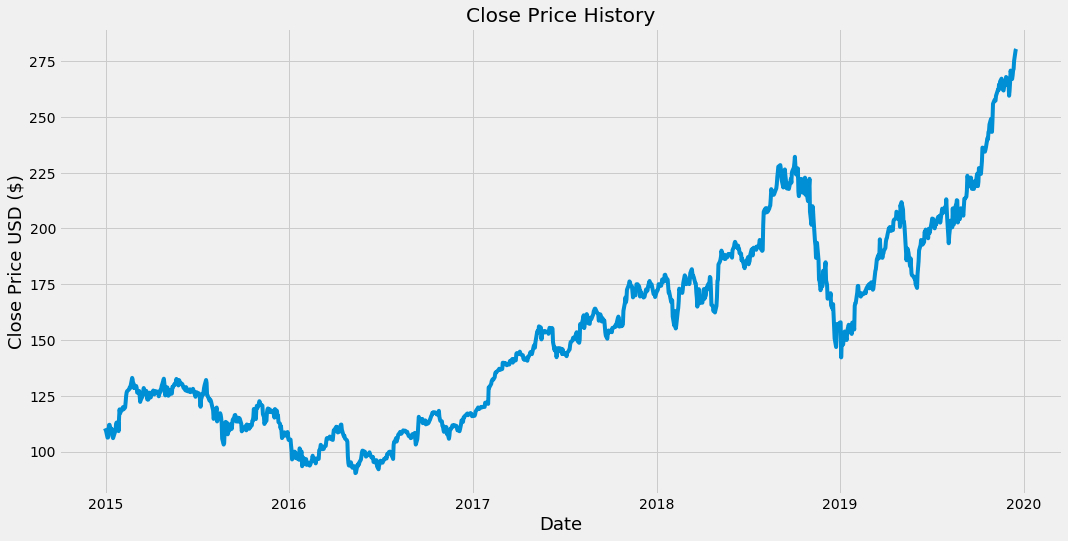

In [ ]:
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

##### Create a new dataframe with only the 'Close column'

In [ ]:
data = df.filter(['Close'])


##### Convert the dataframe to a numpy array

In [ ]:
dataset = data.values

##### Get the number of rows to train the model on

In [ ]:
training_data_len = math.ceil(len(dataset) * .70) 
training_data_len

875

##### Scale the data

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data                                   

array([[0.10543484],
       [0.09991058],
       [0.08370602],
       ...,
       [0.97232593],
       [0.99710623],
       [1.        ]])

##### Create the training data set


##### Create the scaled training data set


In [ ]:
train_data = scaled_data[0:training_data_len, :]

##### Split the data into x_train and y_train sets

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i- 60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.10543484, 0.09991058, 0.08370602, 0.08375864, 0.09159785,
       0.11337929, 0.11401065, 0.09948968, 0.10459307, 0.10238336,
       0.08670491, 0.08233809, 0.09670124, 0.10106806, 0.11606253,
       0.11911404, 0.11974536, 0.09891094, 0.13137265, 0.15026045,
       0.14110594, 0.1488399 , 0.14894515, 0.15373284, 0.15573212,
       0.15041828, 0.15457465, 0.16667543, 0.18172252, 0.19003526,
       0.19329723, 0.19724314, 0.20192562, 0.20050507, 0.20602937,
       0.22444364, 0.22007681, 0.20229387, 0.21086968, 0.20055774,
       0.20387225, 0.2052928 , 0.20097856, 0.18977222, 0.19077182,
       0.19361289, 0.1797759 , 0.16783291, 0.1794602 , 0.17493554,
       0.1820908 , 0.19308677, 0.20061032, 0.19550693, 0.18708899,
       0.19398117, 0.19124536, 0.17383069, 0.17835534, 0.17314675])]
[0.18956176682432557]



##### Convert the x_train and y_train to numpy arrays (so that we can use to train the LSTM model)

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

##### Reshape the data

 (LSTM network expects the input to be 3-dimensional in the form of number of samples number of time stamp and no. of features and right now our x training data set is a 2- dimensional)

In [ ]:
x_train.shape

(815, 60)

(rows, colums, features)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(815, 60, 1)

##### Build the LSTM model

 (50 here is the neurons, True because we are going to use another LSTM layer, False because we are not going to use anymore LSTM layer for our model)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

###### Compile the model

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

###### Train the model

 (Epoch{No. of iteration when entire data is passed forward and backward through a neural network} : One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. 
An epoch is a measure of the number of times all of the training vectors are used once to update the weights. For batch training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are updated.)

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
815/815 [==============================] - 40s 49ms/step - loss: 0.0015


##### Create the testing data set

##### Create a new array containing scaled values from index 815 to 1250

 (rows from training data set -60 to end of the data set {training data set - 60:} and for colums its all columns{:})

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

##### Create the data sets x_test and y_test

y_test(which we want our model to predict, actual 60 first value which are not scaled, these values are the normal value in the dataset), in x_test we append past 60 value to our data here 0 is the column 0


In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

##### Convert the data to a numpy array

In [ ]:
x_test = np.array(x_test)

##### Reshape the data

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##### Get the models predicted price value 

(here we unscaling the value and we want it to contain the same value as y_test dataset contains)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

##### Get the root mean squared error (RMSE)

 {RMSE is a good measure of how accurate the model predict the response and the standard deviation of the residuals and the lower value of our RMSE indicate a better fit, we can also use other models so that we can get an idea of how our model perform but for now we are using RMSE}

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test) ** 2 )
rmse  

0.09913484700520833

##### Plot the data

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


T:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Visualize the data

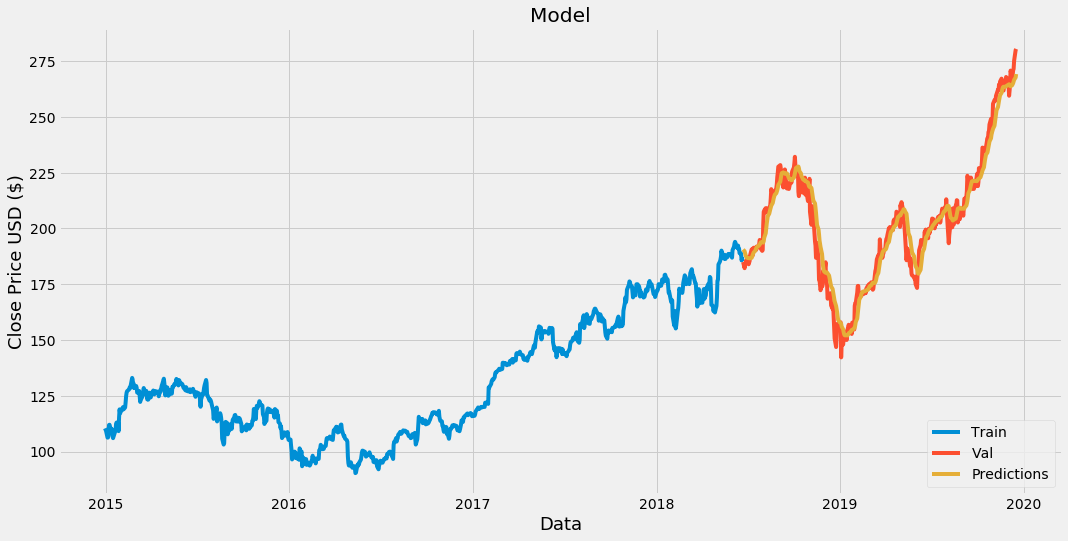

In [ ]:
plt.figure(figsize =  (16, 8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In the above plot the reddish orange color is the actual value for the rest of these days is the actual closing stock price for Apple for the rest of the days and then the orangish yellow is the predictions is what our model predicted the values to be so that this line here and they are really really close so its look like our model is pretty decent

##### Show the valid/actual price and the predicted prices

In [ ]:
valid

,Close,Predictions
Date,,
2018-06-22,184.919998,190.514069
2018-06-25,182.169998,189.734573
2018-06-26,184.429993,188.788574
2018-06-27,184.160004,188.002792
2018-06-28,185.500000,187.350952
...,...,...
2019-12-11,270.769989,265.051575
2019-12-12,271.459991,265.757507
2019-12-13,275.149994,266.559875


##### Get the quote

In [ ]:
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2015-01-01', end = '2019-12-17')


 ##### Create a new dataframe

In [ ]:
new_df = apple_quote.filter(['Close'])

###### Get the last 60 day closing price values and convert the dataframe to an array

In [ ]:
last_60_days = new_df[-60:].values

##### Scale the data to be values between 0 to 1

In [ ]:
last_60_days_scaled = scaler.transform(last_60_days)

##### Create an empty list

In [ ]:
X_test = []

##### Append the past 60 days

In [ ]:
X_test.append(last_60_days_scaled)

##### Convert the X_test data set to a numpy array

In [ ]:
X_test = np.array(X_test)

##### Reshape the data

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

##### Get the predicted scaled price

In [ ]:
pred_price = model.predict(X_test)

##### Undo the scaling 

In [ ]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[270.8302]]


##### Get the quote

In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2015-01-01', end = '2019-12-17')
print(apple_quote2['Close'])

Date
2014-12-31    110.379997
2015-01-02    109.330002
2015-01-05    106.250000
2015-01-06    106.260002
2015-01-07    107.750000
                 ...    
2019-12-11    270.769989
2019-12-12    271.459991
2019-12-13    275.149994
2019-12-16    279.859985
2019-12-17    280.410004
Name: Close, Length: 1250, dtype: float64


 On 2019-12-17 the actual price is 280.410004 and our predicted price is 270.8302 which is little bit off by 9.579804 value.